In [22]:
# project: p11
# submitter: erlasecki
# partner: none
# hours: 7

In [23]:
import os
import csv
import json
from collections import namedtuple

In [24]:
import pandas as pd

def scatter(x, y, xlabel="please label me!", ylabel="please label me!"):
    df = pd.DataFrame({"x":x, "y":y})
    ax = df.plot.scatter(x="x", y="y", color="black", fontsize=16, xlim=0, ylim=0)
    ax.set_xlabel(xlabel, fontsize=16)
    ax.set_ylabel(ylabel, fontsize=16)
    ax.get_xaxis().get_major_formatter().set_scientific(False)
    ax.get_yaxis().get_major_formatter().set_scientific(False)

In [25]:
Tweet = namedtuple("Tweet", ["tweet_id", "username", "num_liked", "length"])

In [26]:
#from p10
def get_paths(directory_path, file_type):
    files = os.listdir(directory_path)
    specific_paths = []
    all_paths = []
    for i in range(len(files)):
        all_paths.append(os.path.join(directory_path, files[i]))
    if file_type != None:
        for i in range(len(all_paths)):
            name, extension = os.path.splitext(all_paths[i])
            for j in range(len(file_type)):    
                if extension.replace(".","") == file_type[j]:
                    specific_paths.append(all_paths[i])
    return specific_paths

In [27]:
#from p10
def find_tweets(directory, file=None):
    data_tweets = []
    if file == None:
        file_path = directory
    else:
        file_path = os.path.join(directory, file)
    name, extension = os.path.splitext(file_path)
    f = open(file_path, "r")
    if extension == ".csv":
        readfile = csv.reader(f, delimiter=",")
        next(readfile)
        for row in readfile:
            #print(row)
            if len(row) == 6:
                tweet_id = row[0]
                username = row[2]
                num_liked = int(row[3])
                length = int(len(row[4]))
                data_tweets.append(Tweet(tweet_id, username, num_liked, length))
    elif extension == ".json":
        try:
            data = json.load(f)
        except:
            f.close()
            return []
        for key in data:
            #print(key)
            tweet_id = key
            username = data[key]["username"]
            length = int(len(data[key]["tweet_text"]))
            if (data[key]["num_liked"] == "unkown") or (data[key]["num_liked"] == "unknown"):
                num_liked = 0          
            else:
                try:
                    num_liked = int(data[key]["num_liked"])
                except ValueError:
                    num_liked = data[key]["num_liked"]
            data_tweets.append(Tweet(tweet_id, username, num_liked, length))
    f.close()
    return data_tweets

In [28]:
#from p10 NEED TO FIX!!!!!
def convert_num_liked(tweet):
    try:
        int(tweet.num_liked)
    except:
        if tweet.num_liked == "unknown":
            return 0
        elif "k" in tweet.num_liked:
            return int(tweet.num_liked.replace("k", "000"))
        elif "M" in tweet.num_liked:
            return int(tweet.num_liked.replace("M", "000000"))
    return int(tweet.num_liked)

In [29]:
#NEED TO FIND UNIQUE TWEET LENGTHS idk how to access the specific tweet length 
#Q1:How many unique tweet lengths are present in the dataset?
full_data_files = sorted(os.listdir("full_data"), reverse = True)
all_tweets = []
for i in range(len(full_data_files)):
        all_tweets = all_tweets + find_tweets("full_data", full_data_files[i])
    
len(all_tweets)

445

In [30]:
#Q2: Which usernames appear in the dataset?
usernames = set()
for tweet in all_tweets:
    #print(tweet)
    usernames.add(tweet.username)
list(usernames)

['USERID_6',
 'USERID_9',
 'USERID_7',
 'USERID_10',
 'USERID_3',
 'USERID_5',
 'USERID_4',
 'USERID_8',
 'USERID_1',
 'USERID_2']

In [31]:
def tweets_per_user(number=None):
    num_tweets_per_user = {}
    for tweet in all_tweets:
        count = 0
        likes = convert_num_liked(tweet)
        if number != None:
            for i in range(len(number)): 
                if number[i] == likes:
                    count = 1
        if count != 1:
            if tweet.username not in num_tweets_per_user:
                num_tweets_per_user[tweet.username] = 1
            else:
                num_tweets_per_user[tweet.username] += 1
    return num_tweets_per_user

In [32]:
#Q3: How prolific is each user?
user_tweet_num = tweets_per_user()
user_tweet_num

{'USERID_1': 52,
 'USERID_7': 55,
 'USERID_10': 45,
 'USERID_9': 44,
 'USERID_4': 35,
 'USERID_6': 51,
 'USERID_3': 39,
 'USERID_2': 47,
 'USERID_5': 46,
 'USERID_8': 31}

In [33]:
def most_likes_per_user(number=None):
    most_likes_per_user = {}
    for tweet in all_tweets:
        count = 0
        likes = convert_num_liked(tweet)
        if number != None:
            for i in range(len(number)): 
                if number[i] == likes:
                    count = 1
        if count != 1:
            if tweet.username not in most_likes_per_user:
                most_likes_per_user[tweet.username] = likes
            else:
                if most_likes_per_user[tweet.username] < likes:
                    most_likes_per_user[tweet.username] = likes
    return most_likes_per_user

In [34]:
#Q4: What is the length of the longest tweet for each user?
longest_tweet = {}
for tweet in all_tweets:
    if tweet.username not in longest_tweet:
        longest_tweet[tweet.username] = tweet.length
    else:
        if longest_tweet[tweet.username] < tweet.length:
            longest_tweet[tweet.username] = tweet.length
longest_tweet

{'USERID_1': 150,
 'USERID_7': 144,
 'USERID_10': 136,
 'USERID_9': 137,
 'USERID_4': 138,
 'USERID_6': 145,
 'USERID_3': 138,
 'USERID_2': 138,
 'USERID_5': 146,
 'USERID_8': 145}

In [35]:
#Q5: What is the largest number of likes received on a tweet for each user?
most_likes = most_likes_per_user()
most_likes

{'USERID_1': 9393,
 'USERID_7': 9851,
 'USERID_10': 9936,
 'USERID_9': 9728,
 'USERID_4': 9618,
 'USERID_6': 9149,
 'USERID_3': 9678,
 'USERID_2': 869000000,
 'USERID_5': 9608,
 'USERID_8': 915000}

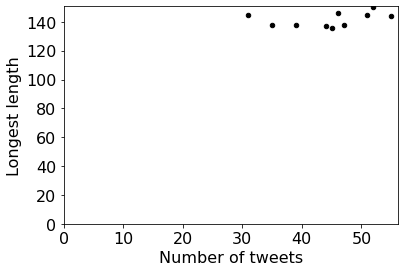

In [36]:
#Q6: What is the relationship between the number of tweets by a user and the length of their longest tweet?
scatter(user_tweet_num, longest_tweet, xlabel="Number of tweets", ylabel="Longest length")

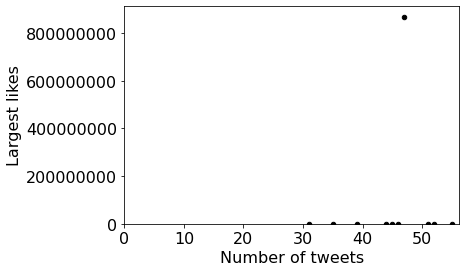

In [37]:
#Q7: What is the relationship between the number of tweets and the largest number of likes?
scatter(user_tweet_num, most_likes, xlabel="Number of tweets", ylabel="Largest likes")

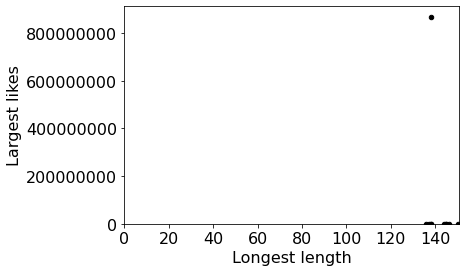

In [38]:
#Q8: What is the relationship between the length of their longest tweet and the largest number of likes?
scatter(longest_tweet, most_likes, xlabel="Longest length", ylabel="Largest likes")

In [39]:
#Q9: What is the username of the user represented by the outlier in the last two plots?
max_likes = 0
max_likes_user = None
for key in most_likes:
    #print(key)
    if most_likes[key] > max_likes:
        max_likes_user = key
        max_likes = most_likes[key]
max_likes_user

'USERID_2'

In [40]:
#FIX M IN LIST 
#Q10: What are the tweets made by that outlier user?
max_likes_user_tweets = []
for tweet in all_tweets:
    if max_likes_user == tweet.username:
        max_likes_user_tweets.append(tweet)

max_likes_user_tweets.sort(key = convert_num_liked, reverse = True)
max_likes_user_tweets

[Tweet(tweet_id='1467894593', username='USERID_2', num_liked='869M', length=136),
 Tweet(tweet_id='1467875163', username='USERID_2', num_liked=9891, length=69),
 Tweet(tweet_id='1467862806', username='USERID_2', num_liked=9465, length=68),
 Tweet(tweet_id='1467907751', username='USERID_2', num_liked=9048, length=110),
 Tweet(tweet_id='1467928764', username='USERID_2', num_liked=9026, length=41),
 Tweet(tweet_id='1467943007', username='USERID_2', num_liked=9000, length=130),
 Tweet(tweet_id='1467918682', username='USERID_2', num_liked=8884, length=102),
 Tweet(tweet_id='1467935121', username='USERID_2', num_liked=8740, length=37),
 Tweet(tweet_id='1467947913', username='USERID_2', num_liked=8578, length=36),
 Tweet(tweet_id='1467892667', username='USERID_2', num_liked=8270, length=20),
 Tweet(tweet_id='1467897316', username='USERID_2', num_liked=7890, length=64),
 Tweet(tweet_id='1467854917', username='USERID_2', num_liked=7741, length=30),
 Tweet(tweet_id='1467961106', username='USERID

In [41]:
#Q11: After excluding the outlier tweet of this outlier user (found in q10), what is the average of the remaining num_liked values for this user?
total_amount = 0
count = 0
for tweet in max_likes_user_tweets:
    #print(tweet)
    likes = convert_num_liked(tweet)
    if likes == max_likes:
        pass
    else:
        total_amount += likes
        count += 1
float(total_amount / count)

5003.565217391304

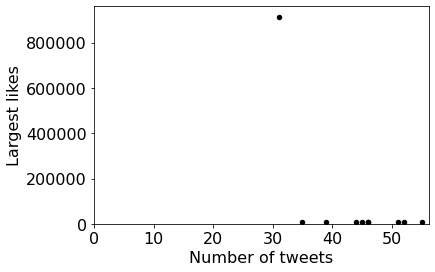

In [43]:
#Q12: WRONG If we exclude the top 3 most-liked tweets (among all tweets), what is the relationship between the number of tweets and the largest number of likes?
num_tweets_exlude_outlier = tweets_per_user([max_likes])
most_liked_exlude_outlier = most_likes_per_user([max_likes])
scatter(num_tweets_exlude_outlier, most_liked_exlude_outlier, xlabel="Number of tweets", ylabel="Largest likes")

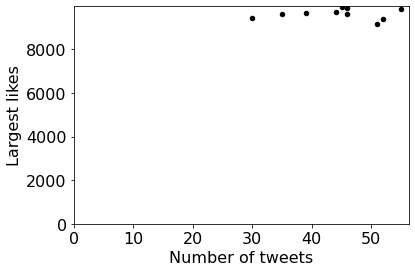

In [46]:
#Q13: WRONG If we exclude the 20 most-liked tweets (among all tweets), what is the relationship between the number of tweets and the largest number of likes?
second_max_likes = 0
for key in most_liked_exlude_outlier:
    if most_liked_exlude_outlier[key] > second_max_likes:
        second_max_likes = most_liked_exlude_outlier[key]

num_tweets_exlude_two_outliers = tweets_per_user([max_likes, second_max_likes])
most_liked_exlude_two_outlier = most_likes_per_user([max_likes, second_max_likes])
scatter(num_tweets_exlude_two_outliers, most_liked_exlude_two_outlier, xlabel="Number of tweets", ylabel="Largest likes")

In [58]:
def get_all_paths(path):
    files = os.listdir(path)
    paths_list = []
    for i in range(len(files)):
        if files[i].startswith("."):
            pass 
        else:
            file = os.path.join(path, files[i])
            if os.path.isdir(file):
                paths_list += get_all_paths(file)
            elif os.path.isfile(file):
                paths_list.append(file)
    return paths_list

In [59]:
#IN WRONG ORDER 
#Q14: What are the files in the rb directory of play directory?
get_all_paths(os.path.join("play", "rb"))

['play/rb/rb9/12.xls', 'play/rb/rb9/89.csv', 'play/rb/ppt.ppt']

In [61]:
#IN WRONG ORDER
#Q15: What are the files in the qwe directory of ls directory of the play directory?
get_all_paths(os.path.join("play", "ls", "qwe"))

['play/ls/qwe/usun.pdf', 'play/ls/qwe/iuqwe.json']

In [62]:
#IN WRONG ORDER
#Q16: What are the files in the play directory
get_all_paths("play")

['play/ls/lu.txt',
 'play/ls/mf.py',
 'play/ls/qwe/usun.pdf',
 'play/ls/qwe/iuqwe.json',
 'play/ou/quap/aoq/qsonj',
 'play/ou/quap/aoq/aqnsa',
 'play/ou/quap/uikwe',
 'play/ou/quap/qonxu.txt',
 'play/ou/a',
 'play/ou/v',
 'play/ou/b',
 'play/rb/rb9/12.xls',
 'play/rb/rb9/89.csv',
 'play/rb/ppt.ppt']

In [63]:
#IN WRONG ORDEr
#Q17: What are the files in the others directory of the recursive directory?
get_all_paths(os.path.join("recursive", "others"))

['recursive/others/USERID_5.json',
 'recursive/others/USERID_9.json',
 'recursive/others/USERID_8.json',
 'recursive/others/USERID_7.json',
 'recursive/others/USERID_10.json',
 'recursive/others/USERID_6.json']

In [64]:
#in wrong order
#Q18: What are the files in the recursive directory?
get_all_paths("recursive")

['recursive/others/USERID_5.json',
 'recursive/others/USERID_9.json',
 'recursive/others/USERID_8.json',
 'recursive/others/USERID_7.json',
 'recursive/others/USERID_10.json',
 'recursive/others/USERID_6.json',
 'recursive/USERID_1/tweets.json',
 'recursive/USERID_3/tweets.json',
 'recursive/USERID_4/1.csv',
 'recursive/USERID_4/2.csv',
 'recursive/USERID_4/1.json',
 'recursive/USERID_4/2.json',
 'recursive/USERID_4/true/tweets.json',
 'recursive/USERID_4/false/tweets.json',
 'recursive/USERID_2/tweets.json']

In [66]:
#Q19: How many tweets are in the files in the USERID_4 directory of the recursive directory?
userid4_files = get_all_paths(os.path.join("recursive", "USERID_4"))
userid4_list = []
for i in range(len(userid4_files)):
    userid4_list += (find_tweets(userid4_files[i]))
len(userid4_list)

37

In [67]:
#Q20: How many tweets are in the files in the recursive directory?
recursive_files = get_all_paths("recursive")
recursive_list = []
for i in range(len(recursive_files)):
    recursive_list += find_tweets(recursive_files[i])
len(recursive_list)

220